In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
df = pd.read_excel(r'C:\Users\APARNA NAGDEVE\Desktop\customized discounts\dataset.xlsx')
df.head()


,Ship_to_ID,Volume_2019_customer_level,Volume_2018_customer_level,sfdc_tier,poc_image,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,province,Discount_Total
0,29000332,0.48,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.0,0.48,12.23,Brussels Capital Region,0.00
1,29000441,0.45,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.0,0.45,7.85,LiŠge,0.00
2,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46
3,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,6001.00,1425.19,180.0,20.40,519.41,Antwerp,1605.19
4,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,RETURNABLE,3051.36,718.32,0.0,12.00,288.63,Antwerp,718.32


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39859 entries, 0 to 39858
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ship_to_ID                  39859 non-null  int64  
 1   Volume_2019_customer_level  39859 non-null  float64
 2   Volume_2018_customer_level  39859 non-null  float64
 3   sfdc_tier                   39859 non-null  object 
 4   poc_image                   39859 non-null  object 
 5   segment                     39859 non-null  object 
 6   sub_segment                 39859 non-null  object 
 7   Product_Set                 39859 non-null  object 
 8   Brand                       39859 non-null  object 
 9   Sub_Brand                   39859 non-null  object 
 10  Pack_Type                   39859 non-null  object 
 11  Returnalility               39859 non-null  object 
 12  GTO_2019                    39859 non-null  float64
 13  OnInvoice Discount(LCU)     398

In [3]:
print("Total Rows = " + str(df.shape[0]) + "\nTotal Columns = " + str(df.shape[1])) 

Total Rows = 39859
Total Columns = 19


In [4]:
df.nunique()

Ship_to_ID                     4568
Volume_2019_customer_level     4055
Volume_2018_customer_level     4082
sfdc_tier                         3
poc_image                         3
segment                           6
sub_segment                      16
Product_Set                     143
Brand                            24
Sub_Brand                        65
Pack_Type                         5
Returnalility                     2
GTO_2019                      10552
OnInvoice Discount(LCU)       14050
OffInvoice Discount(LCU)       9205
Volume_2019                    3032
Tax                            9277
province                         11
Discount_Total                17810
dtype: int64

In [5]:
df.describe()

,Ship_to_ID,Volume_2019_customer_level,Volume_2018_customer_level,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,Discount_Total
count,3.985900e+04,39859.000000,39859.000000,3.985900e+04,39859.000000,3.985900e+04,39859.000000,39859.000000,3.985900e+04
mean,2.914348e+07,125.514751,124.553338,2.329499e+03,296.258596,3.227985e+02,8.466336,196.776225,6.190571e+02
std,2.239413e+05,417.311600,434.081066,2.183562e+04,2215.120009,1.005300e+04,88.055689,1523.500791,1.050909e+04
min,2.900033e+07,-6.000000,-21.100000,-1.625964e+04,-1721.640000,-2.097762e+04,-18.600000,-442.540000,-2.087009e+04
25%,2.904831e+07,23.635000,24.200000,7.712000e+01,0.000000,0.000000e+00,0.237000,4.505000,6.540000e+00
50%,2.906538e+07,60.583000,59.332000,2.234700e+02,18.000000,0.000000e+00,0.600000,14.100000,3.370000e+01
75%,2.908330e+07,117.508000,117.687000,7.992400e+02,87.080000,1.643000e+01,2.340000,60.845000,1.422400e+02
max,2.995048e+07,14773.000000,11636.000000,2.727988e+06,214981.440000,1.260856e+06,11662.500000,153880.570000,1.260856e+06


In [6]:
df.drop(columns="Ship_to_ID", inplace = True, axis =1) #because ship-to id is unique to everyone and is insignificant
df.head() 

,Volume_2019_customer_level,Volume_2018_customer_level,sfdc_tier,poc_image,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,province,Discount_Total
0,0.48,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.0,0.48,12.23,Brussels Capital Region,0.00
1,0.45,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.0,0.45,7.85,LiŠge,0.00
2,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46
3,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,6001.00,1425.19,180.0,20.40,519.41,Antwerp,1605.19
4,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,RETURNABLE,3051.36,718.32,0.0,12.00,288.63,Antwerp,718.32


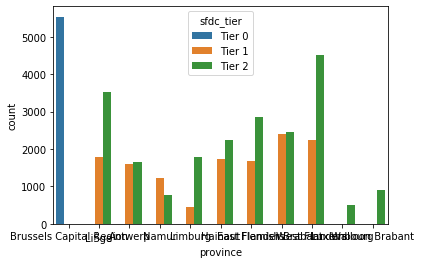

In [7]:
sns.countplot(x = "province", hue = 'sfdc_tier', data= df)

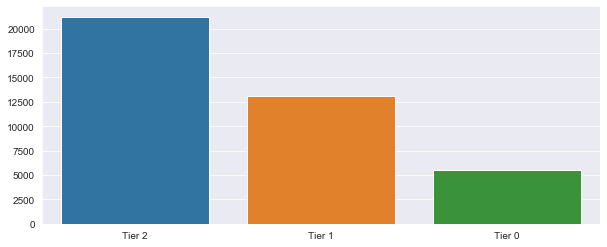

In [8]:
sfdc_tier = df.sfdc_tier.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=sfdc_tier.index, y=sfdc_tier.values)
plt.show()

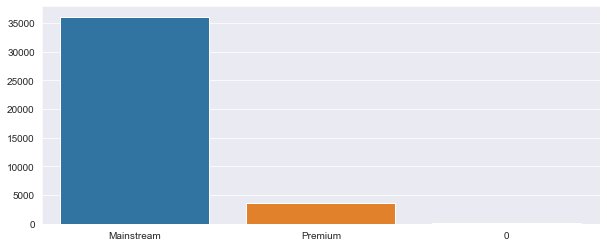

In [9]:
poc_image= df.poc_image.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=poc_image.index, y=poc_image.values)
plt.show()

In [10]:
df = df.loc[df["poc_image"] != '0']
df.shape

(39859, 18)

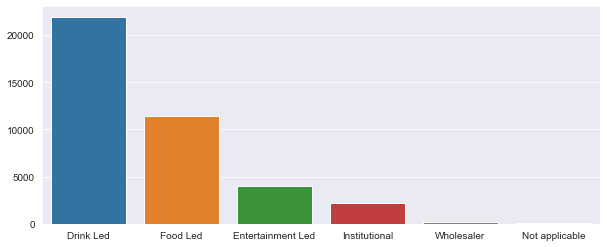

In [11]:
segment= df.segment.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=segment.index, y=segment.values)
plt.show()

In [12]:
#binning 
conditions = [
    df['segment'].str.contains('Drink Led'),
    df['segment'].str.contains('Food Led'),
    df['segment'].str.contains('Entertainment Led')]

choices = ['Drink Led','Food Led', 'Entertainment Led']

df['segment'] = np.select(conditions, choices, default='Other')

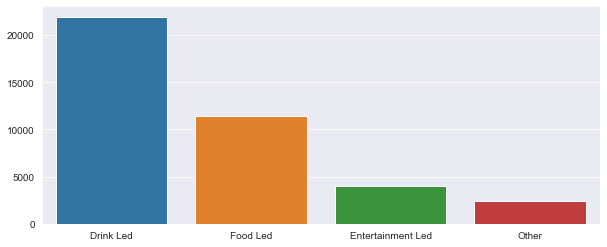

In [13]:
segment= df.segment.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=segment.index, y=segment.values)
plt.show()

In [14]:
# finding the top 10 categories
df.sub_segment.value_counts().sort_values(ascending=False).head(14)
#we will take top 10 for one hot encoding

Bar               14605
Hybrid             6768
Beer bar           6385
Restaurant         4071
Institutional      2176
Sports Venue       2064
Events             1002
Party Place         751
Recreational        667
Quick Dining        629
Music Venue         293
Wholesaler          208
Cocktail Bar        180
Not applicable       33
Name: sub_segment, dtype: int64

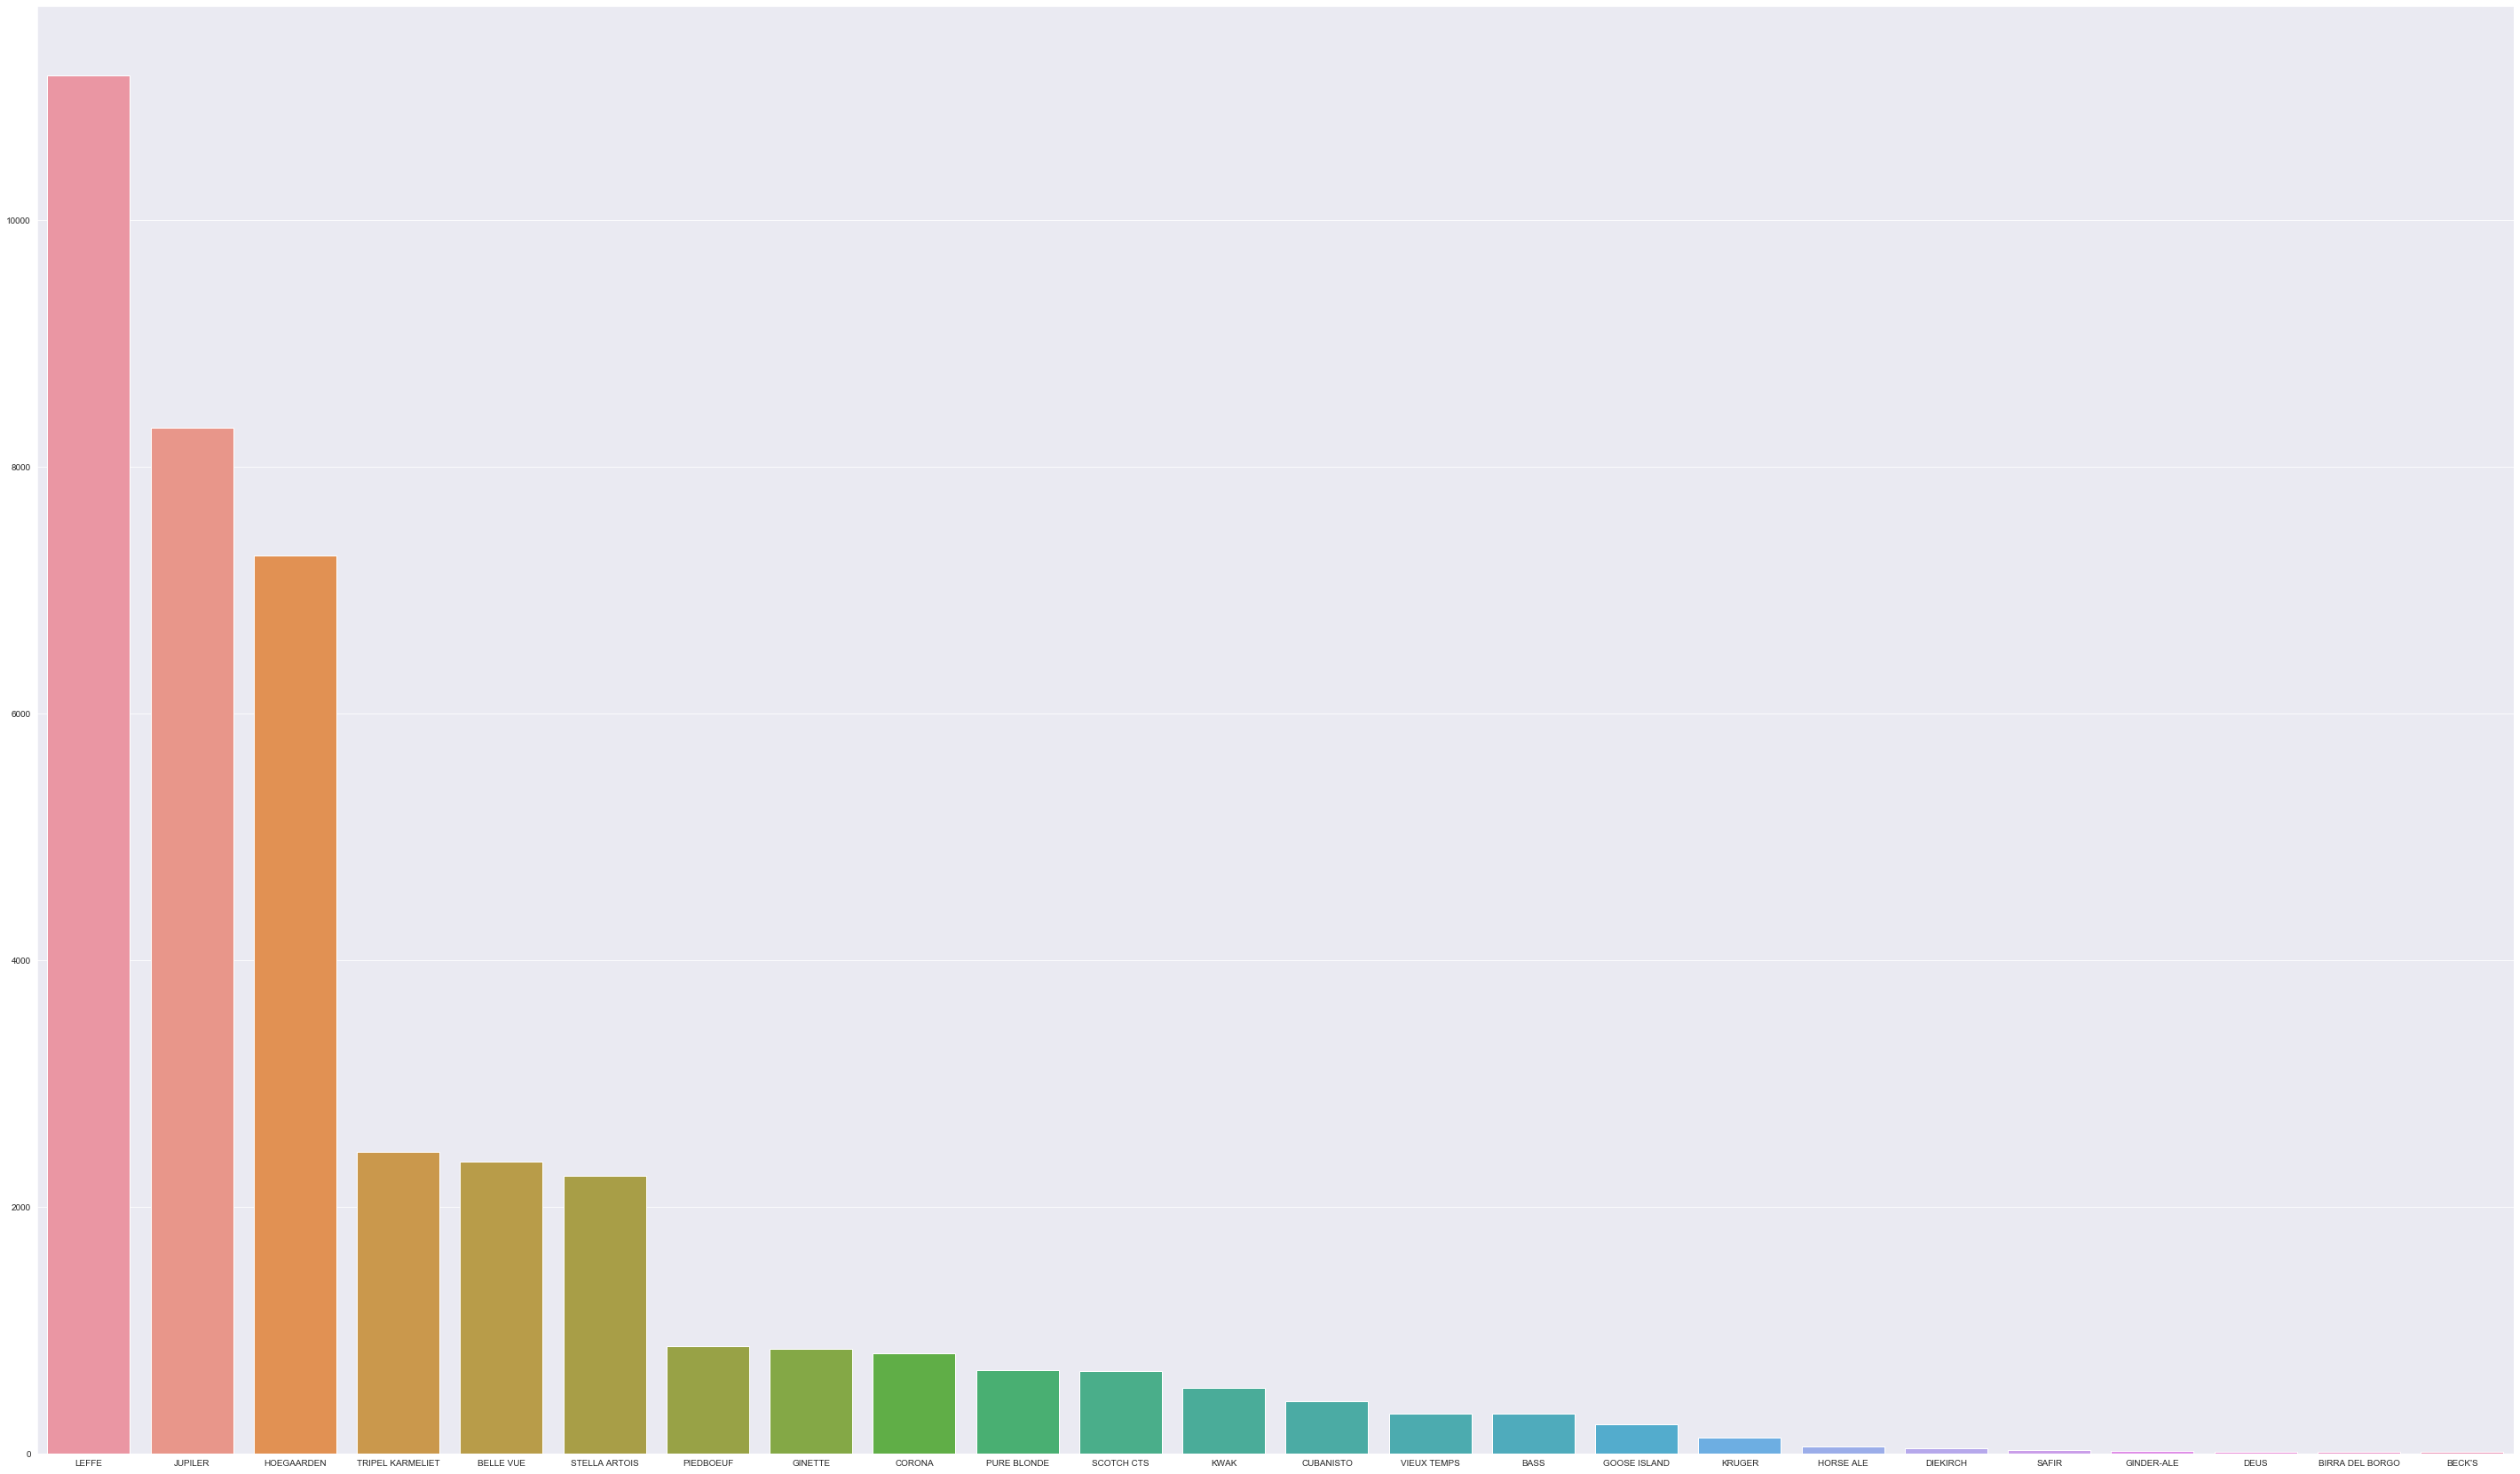

In [15]:
Brand= df.Brand.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(50,30))
sns.barplot(x=Brand.index, y=Brand.values)
plt.show()

In [16]:
#binning
conditions = [
    df['Brand'].str.contains('JUPILER'),
    df['Brand'].str.contains('LEFFE'),
    df['Brand'].str.contains('HOEGAARDEN'),
    df['Brand'].str.contains('TRIPLE KARMELIET'),
    df['Brand'].str.contains('BELLE VUE'),
    df['Brand'].str.contains('STELLA ARTOIS'),
    df['Brand'].str.contains('GINETTE'),
    df['Brand'].str.contains('CORONA')]

choices = ['JUPILER', 'LEFFE', 'HOEGAARDEN', 'TRIPLE KARMELIET','BELLE VUE','STELLA ARTOIS','GINETTE','CORONA']

df['Brand'] = np.select(conditions, choices, default='Other')


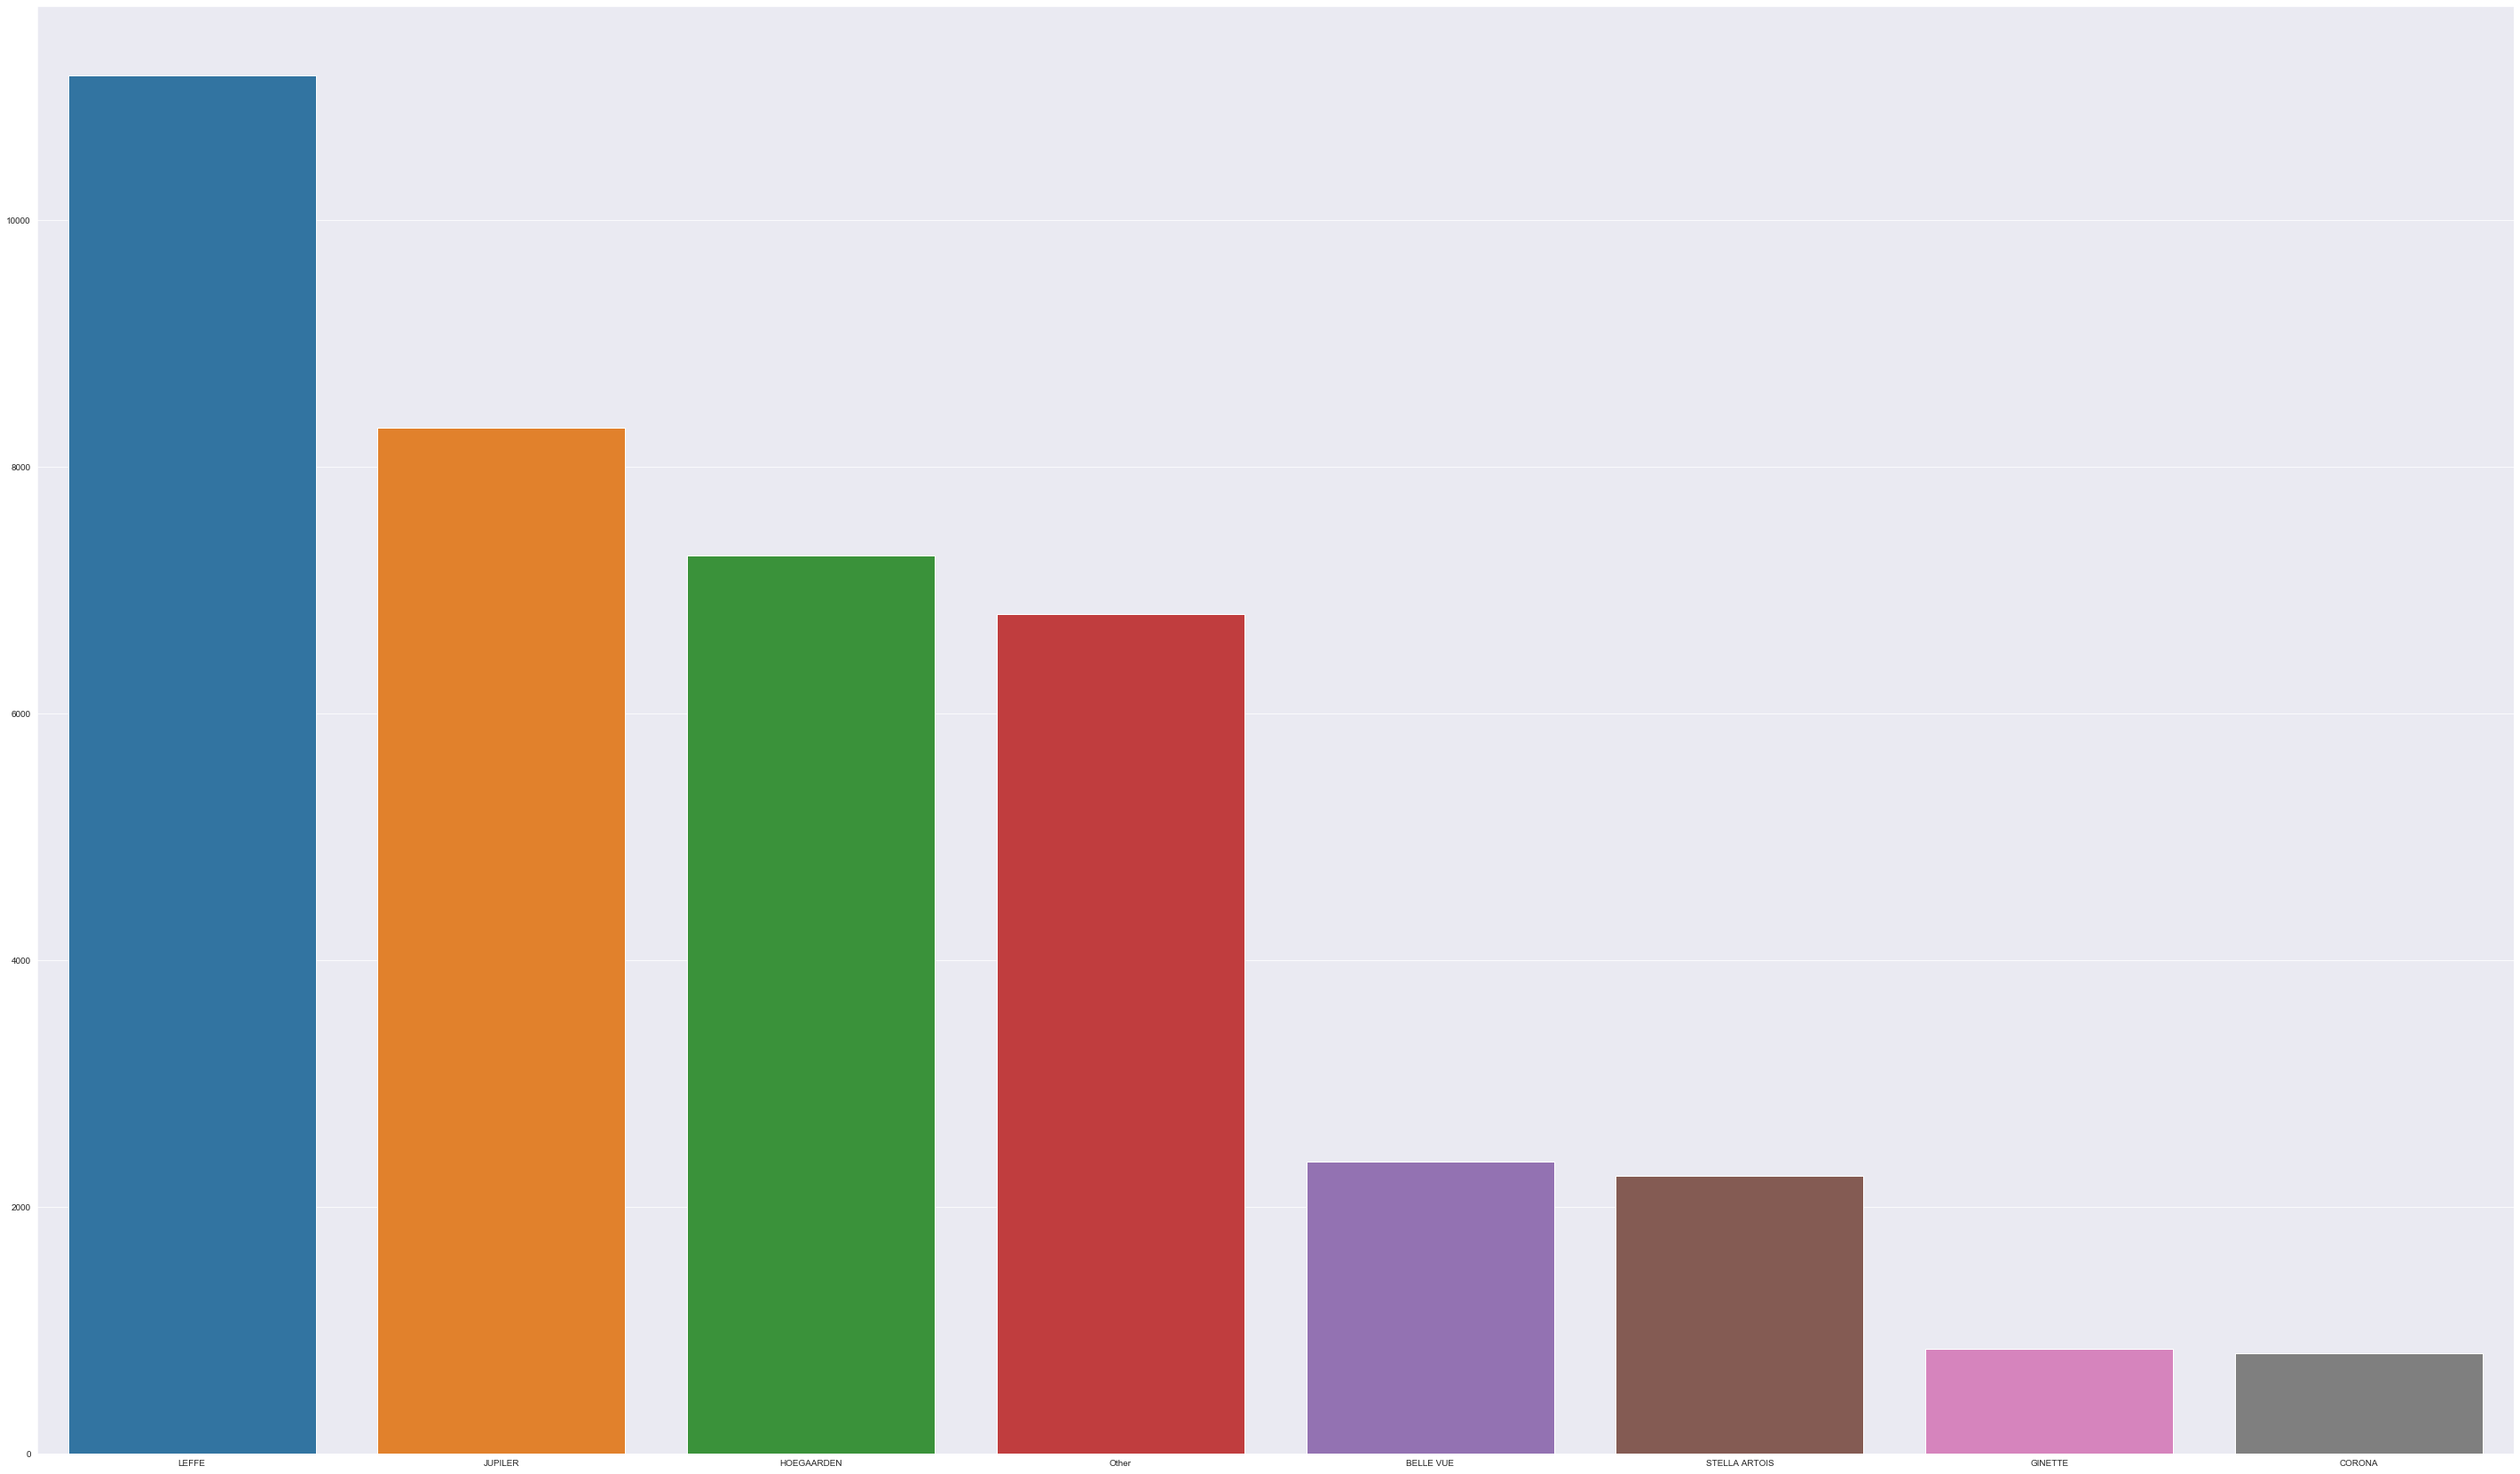

In [17]:
Brand= df.Brand.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(50,30))
sns.barplot(x=Brand.index, y=Brand.values)
plt.show()

In [18]:
# finding the top 12 categories
df.Brand.value_counts().sort_values(ascending=False).head(12)
#we will take top 12 for one hot encoding

LEFFE            11176
JUPILER           8320
HOEGAARDEN        7278
Other             6809
BELLE VUE         2364
STELLA ARTOIS     2254
GINETTE            848
CORONA             810
Name: Brand, dtype: int64

In [19]:
Sub_Brand= df.Sub_Brand.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(140,140))
sns.barplot(x=Sub_Brand.index, y=Sub_Brand.values)
plt.show()

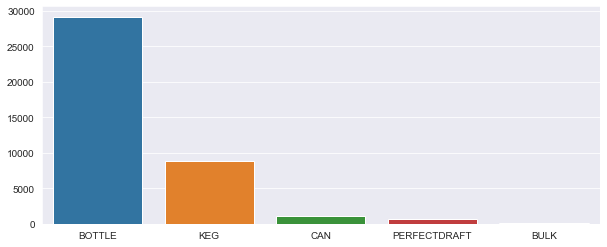

In [20]:
Pack_Type = df.Pack_Type.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Pack_Type.index, y=Pack_Type.values)
plt.show()

In [21]:
#binning 
conditions = [
    df['Pack_Type'].str.contains('BOTTLE'),
    df['Pack_Type'].str.contains('KEG')]

choices = ['BOTTLE','KEG']

df['Pack_Type'] = np.select(conditions, choices, default='Other')


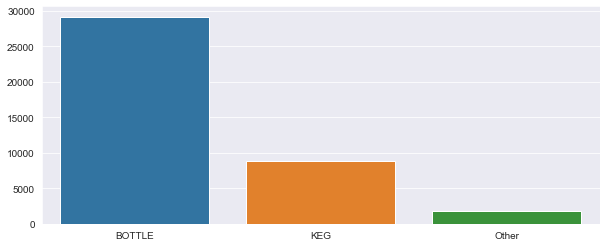

In [22]:
Pack_Type = df.Pack_Type.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Pack_Type.index, y=Pack_Type.values)
plt.show()

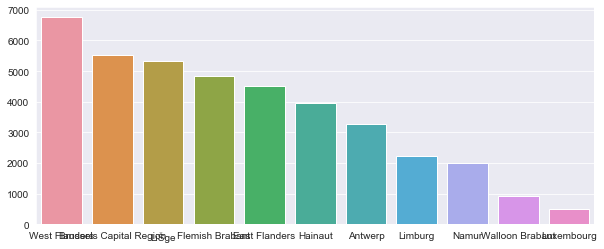

In [23]:
province = df.province.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=province.index, y=province.values)
plt.show()

In [24]:
# unique values in each columns
for x in df.columns:
    #prinfting unique values
    print(x ,':', len(df[x].unique()))

Volume_2019_customer_level : 4055
Volume_2018_customer_level : 4082
sfdc_tier : 3
poc_image : 3
segment : 4
sub_segment : 16
Product_Set : 143
Brand : 8
Sub_Brand : 65
Pack_Type : 3
Returnalility : 2
GTO_2019 : 10552
OnInvoice Discount(LCU) : 14050
OffInvoice Discount(LCU) : 9205
Volume_2019 : 3032
Tax : 9277
province : 11
Discount_Total : 17810


In [25]:
df.head()

,Volume_2019_customer_level,Volume_2018_customer_level,sfdc_tier,poc_image,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,province,Discount_Total
0,0.48,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.0,0.48,12.23,Brussels Capital Region,0.00
1,0.45,0.540,Tier 1,Mainstream,Other,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,Other,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.0,0.45,7.85,LiŠge,0.00
2,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,Other,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46
3,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,6001.00,1425.19,180.0,20.40,519.41,Antwerp,1605.19
4,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,RETURNABLE,3051.36,718.32,0.0,12.00,288.63,Antwerp,718.32


In [26]:
#categorical encoding using one hot encoding
one_hot_encoded_data = pd.get_dummies(df, columns = ['sfdc_tier', 'poc_image','segment','Brand','Pack_Type','Returnalility'])
one_hot_encoded_data.drop(columns=["Volume_2019_customer_level","Volume_2018_customer_level","Volume_2019","sub_segment","Product_Set","Sub_Brand","province"], inplace = True, axis =1)
one_hot_encoded_data

,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Tax,Discount_Total,sfdc_tier_Tier 0,sfdc_tier_Tier 1,sfdc_tier_Tier 2,poc_image_0,poc_image_Mainstream,...,Brand_HOEGAARDEN,Brand_JUPILER,Brand_LEFFE,Brand_Other,Brand_STELLA ARTOIS,Pack_Type_BOTTLE,Pack_Type_KEG,Pack_Type_Other,Returnalility_OW,Returnalility_RETURNABLE
0,141.20,0.00,0.00,12.23,0.00,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,113.65,0.00,0.00,7.85,0.00,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
2,61551.06,14511.46,0.00,3577.69,14511.46,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
3,6001.00,1425.19,180.00,519.41,1605.19,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,3051.36,718.32,0.00,288.63,718.32,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,613.76,68.06,201.76,65.69,269.82,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
39855,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
39856,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
39857,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [27]:
df.describe()

,Volume_2019_customer_level,Volume_2018_customer_level,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,Discount_Total
count,39859.000000,39859.000000,3.985900e+04,39859.000000,3.985900e+04,39859.000000,39859.000000,3.985900e+04
mean,125.514751,124.553338,2.329499e+03,296.258596,3.227985e+02,8.466336,196.776225,6.190571e+02
std,417.311600,434.081066,2.183562e+04,2215.120009,1.005300e+04,88.055689,1523.500791,1.050909e+04
min,-6.000000,-21.100000,-1.625964e+04,-1721.640000,-2.097762e+04,-18.600000,-442.540000,-2.087009e+04
25%,23.635000,24.200000,7.712000e+01,0.000000,0.000000e+00,0.237000,4.505000,6.540000e+00
50%,60.583000,59.332000,2.234700e+02,18.000000,0.000000e+00,0.600000,14.100000,3.370000e+01
75%,117.508000,117.687000,7.992400e+02,87.080000,1.643000e+01,2.340000,60.845000,1.422400e+02
max,14773.000000,11636.000000,2.727988e+06,214981.440000,1.260856e+06,11662.500000,153880.570000,1.260856e+06


In [28]:
#made a new dataframe with only numerical columns which needed to be scaled- normalization
from sklearn import preprocessing
new_num = df[['Volume_2019_customer_level','Volume_2018_customer_level','Volume_2019']].copy()
x = new_num.values  #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_num = pd.DataFrame(x_scaled)

In [29]:
new_num.columns=['Volume_2019_customer_level','Volume_2018_customer_level','Volume_2019']

In [30]:
new_num.head()

,Volume_2019_customer_level,Volume_2018_customer_level,Volume_2019
0,0.000438,0.001858,0.001633
1,0.000436,0.001856,0.001631
2,0.018741,0.021173,0.022016
3,0.018741,0.021173,0.003339
4,0.018741,0.021173,0.002620


In [31]:
new_df = pd.concat([new_num, one_hot_encoded_data], axis=1, join='inner')

In [32]:
new_customer = (df.Volume_2018_customer_level==0)*1
new_df.insert(2, "New_customer", new_customer, True)

In [33]:
new_df

,Volume_2019_customer_level,Volume_2018_customer_level,New_customer,Volume_2019,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Tax,Discount_Total,sfdc_tier_Tier 0,...,Brand_HOEGAARDEN,Brand_JUPILER,Brand_LEFFE,Brand_Other,Brand_STELLA ARTOIS,Pack_Type_BOTTLE,Pack_Type_KEG,Pack_Type_Other,Returnalility_OW,Returnalility_RETURNABLE
0,0.000438,0.001858,0,0.001633,141.20,0.00,0.00,12.23,0.00,1,...,0,1,0,0,0,1,0,0,0,1
1,0.000436,0.001856,0,0.001631,113.65,0.00,0.00,7.85,0.00,0,...,0,0,0,1,0,1,0,0,0,1
2,0.018741,0.021173,0,0.022016,61551.06,14511.46,0.00,3577.69,14511.46,0,...,0,1,0,0,0,0,0,1,1,0
3,0.018741,0.021173,0,0.003339,6001.00,1425.19,180.00,519.41,1605.19,0,...,0,1,0,0,0,1,0,0,0,1
4,0.018741,0.021173,0,0.002620,3051.36,718.32,0.00,288.63,718.32,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0.003712,0.001917,0,0.001728,613.76,68.06,201.76,65.69,269.82,0,...,0,0,0,1,0,1,0,0,0,1
39855,0.000406,0.001810,1,0.001592,0.00,0.00,0.00,0.00,0.00,0,...,1,0,0,0,0,1,0,0,0,1
39856,0.000406,0.001810,1,0.001592,0.00,0.00,0.00,0.00,0.00,0,...,0,1,0,0,0,1,0,0,0,1
39857,0.000406,0.001810,1,0.001592,0.00,0.00,0.00,0.00,0.00,0,...,0,0,0,1,0,1,0,0,0,1


In [34]:
new_df
# iterating the columns
for col in new_df.columns:
    print(col)

Volume_2019_customer_level
Volume_2018_customer_level
New_customer
Volume_2019
GTO_2019
OnInvoice Discount(LCU)
OffInvoice Discount(LCU)
Tax
Discount_Total
sfdc_tier_Tier 0
sfdc_tier_Tier 1
sfdc_tier_Tier 2
poc_image_0
poc_image_Mainstream
poc_image_Premium
segment_Drink Led
segment_Entertainment Led
segment_Food Led
segment_Other
Brand_BELLE VUE
Brand_CORONA
Brand_GINETTE
Brand_HOEGAARDEN
Brand_JUPILER
Brand_LEFFE
Brand_Other
Brand_STELLA ARTOIS
Pack_Type_BOTTLE
Pack_Type_KEG
Pack_Type_Other
Returnalility_OW
Returnalility_RETURNABLE


In [35]:

max(df['Volume_2019_customer_level'])

14773.0

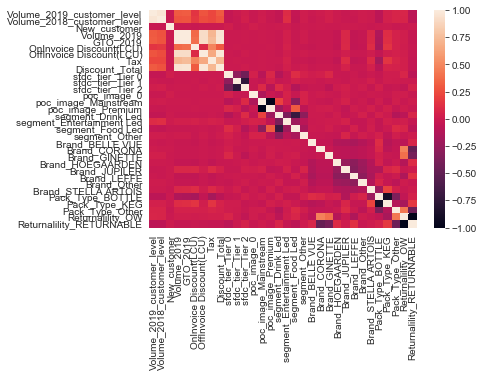

In [36]:
#We can analyse the relationship between the parameters through corelation

corelation = new_df.corr()
sns.heatmap(corelation, xticklabels= corelation.columns, yticklabels = corelation.columns)

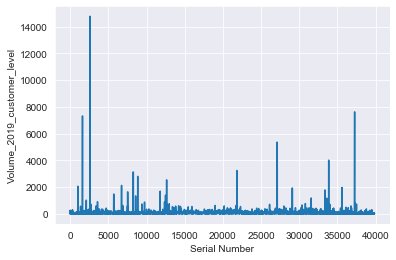

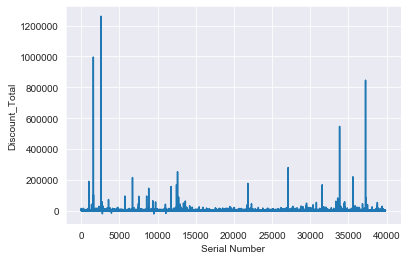

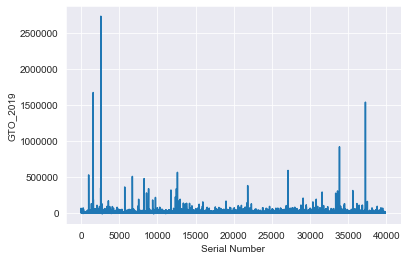

In [37]:
#observing the relationship between Volume_2019,GTO_2019,Discount_Total 
n= df.shape[0] + 1

x = list(range(1, n))
y = df.Volume_2019_customer_level
plt.plot(x, y) 
plt.xlabel('Serial Number')
plt.ylabel('Volume_2019_customer_level')
plt.show()

x = list(range(1, n))
y = df.Discount_Total 
plt.plot(x, y) 
plt.xlabel('Serial Number')
plt.ylabel('Discount_Total')
plt.show()


x = list(range(1, n))
y = df.GTO_2019
plt.plot(x, y)
plt.xlabel('Serial Number')
plt.ylabel('GTO_2019')
plt.show()
#shapes of the graphs is very similar so we can safely say there lies a linear relationship between them

In [38]:
new_df= new_df.loc[new_df["Discount_Total"]!=0]

In [39]:
new_df['GTO_per_rupee_discount']=new_df['GTO_2019']/new_df['Discount_Total']

C:\Users\APARNA NAGDEVE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
new_df['change_in_consumption']=new_df['Volume_2019_customer_level']-new_df['Volume_2018_customer_level']


C:\Users\APARNA NAGDEVE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
new_df.drop(columns=["Volume_2019_customer_level","Volume_2018_customer_level"], inplace = True, axis =1)

C:\Users\APARNA NAGDEVE\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


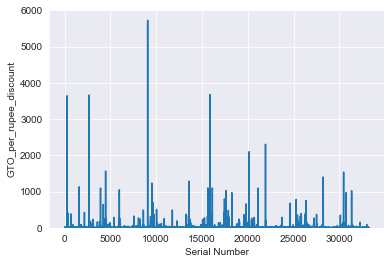

In [42]:
n = new_df.shape[0] + 1
# x axis values
x = list(range(1, n))
# corresponding y axis values
y = new_df.GTO_per_rupee_discount
 

plt.ylim([0, 6000])

# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Serial Number')
# naming the y axis
plt.ylabel('GTO_per_rupee_discount')
 
# function to show the plot
plt.show()

In [43]:
new_df = new_df.loc[new_df["GTO_per_rupee_discount"] > 0]
new_df.shape

(33101, 32)

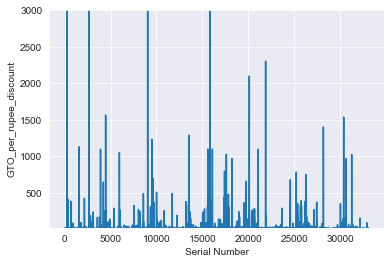

In [44]:
n = new_df.shape[0] + 1
# x axis values
x = list(range(1, n))
# corresponding y axis values
y = new_df.GTO_per_rupee_discount
 

plt.ylim([20, 3000])

# plotting the points

plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Serial Number')
# naming the y axis
plt.ylabel('GTO_per_rupee_discount')
 
# function to show the plot
plt.show()

In [45]:
new_df_high = new_df.loc[new_df["GTO_per_rupee_discount"] <1500]
new_df_high.shape


(33093, 32)

In [46]:
new_df_high.describe()


,New_customer,Volume_2019,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Tax,Discount_Total,sfdc_tier_Tier 0,sfdc_tier_Tier 1,sfdc_tier_Tier 2,...,Brand_LEFFE,Brand_Other,Brand_STELLA ARTOIS,Pack_Type_BOTTLE,Pack_Type_KEG,Pack_Type_Other,Returnalility_OW,Returnalility_RETURNABLE,GTO_per_rupee_discount,change_in_consumption
count,33093.000000,33093.000000,3.309300e+04,33093.000000,3.309300e+04,33093.000000,3.309300e+04,33093.000000,33093.000000,33093.000000,...,33093.000000,33093.000000,33093.000000,33093.000000,33093.000000,33093.000000,33093.000000,33093.000000,3.309300e+04,33093.000000
mean,0.003838,0.002377,2.530520e+03,356.829578,3.887158e+02,211.301211,7.455454e+02,0.138035,0.319675,0.542290,...,0.283172,0.167075,0.057082,0.732300,0.222827,0.044874,0.072160,0.927840,7.727697e+00,-0.003564
std,0.061831,0.008164,2.368828e+04,2426.598090,1.103179e+04,1628.158462,1.152942e+04,0.344942,0.466358,0.498216,...,0.450546,0.373048,0.232002,0.442767,0.416149,0.207029,0.258757,0.258757,3.170288e+01,0.013358
min,0.000000,0.000017,-1.625964e+04,-1721.640000,-2.097762e+04,-442.540000,-2.087009e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.132132e-15,-0.544045
25%,0.000000,0.001613,8.907000e+01,7.300000,0.000000e+00,4.810000,1.685000e+01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.364816e+00,-0.003782
50%,0.000000,0.001653,2.459400e+02,30.240000,0.000000e+00,15.900000,5.318000e+01,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.602049e+00,-0.002366
75%,0.000000,0.001813,8.899800e+02,120.580000,2.976000e+01,67.340000,2.028400e+02,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.706087e+00,-0.001593
max,1.000000,1.000000,2.727988e+06,214981.440000,1.260856e+06,153880.570000,1.260856e+06,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.401200e+03,0.068209


In [47]:
new_df_high


,New_customer,Volume_2019,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Tax,Discount_Total,sfdc_tier_Tier 0,sfdc_tier_Tier 1,sfdc_tier_Tier 2,...,Brand_LEFFE,Brand_Other,Brand_STELLA ARTOIS,Pack_Type_BOTTLE,Pack_Type_KEG,Pack_Type_Other,Returnalility_OW,Returnalility_RETURNABLE,GTO_per_rupee_discount,change_in_consumption
2,0,0.022016,61551.06,14511.46,0.00,3577.69,14511.46,0,1,0,...,0,0,0,0,0,1,1,0,4.241548,-0.002433
3,0,0.003339,6001.00,1425.19,180.00,519.41,1605.19,0,1,0,...,0,0,0,1,0,0,0,1,3.738498,-0.002433
4,0,0.002620,3051.36,718.32,0.00,288.63,718.32,0,1,0,...,0,0,0,0,1,0,0,1,4.247912,-0.002433
7,0,0.002563,2227.65,0.00,686.13,61.37,686.13,0,0,1,...,0,1,0,1,0,0,0,1,3.246688,-0.001619
8,0,0.003079,3412.19,0.00,1050.98,94.12,1050.98,0,0,1,...,0,1,0,1,0,0,0,1,3.246675,-0.001619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39850,0,0.001613,91.98,10.20,34.23,6.99,44.43,0,0,1,...,1,0,0,1,0,0,0,1,2.070223,0.001795
39851,0,0.001633,214.14,18.02,76.56,17.81,94.58,0,0,1,...,1,0,0,1,0,0,0,1,2.264115,0.001795
39852,0,0.001541,-210.20,-25.80,-78.83,-8.07,-104.63,0,0,1,...,0,1,0,1,0,0,0,1,2.008984,0.001795
39853,0,0.001608,51.44,7.74,18.63,4.58,26.37,0,0,1,...,0,0,1,1,0,0,0,1,1.950702,0.001795


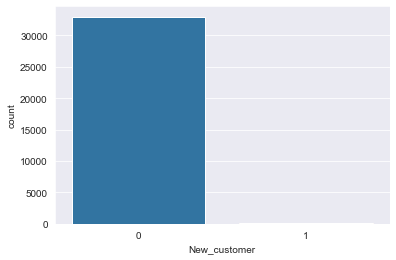

In [48]:
sns.countplot(x = "New_customer", data= new_df_high)

In [49]:
data_new_customers= new_df_high.loc[new_df_high["New_customer"]==1]
data_new_customers.shape

(127, 32)

In [50]:
data_new_customers.head()

,New_customer,Volume_2019,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Tax,Discount_Total,sfdc_tier_Tier 0,sfdc_tier_Tier 1,sfdc_tier_Tier 2,...,Brand_LEFFE,Brand_Other,Brand_STELLA ARTOIS,Pack_Type_BOTTLE,Pack_Type_KEG,Pack_Type_Other,Returnalility_OW,Returnalility_RETURNABLE,GTO_per_rupee_discount,change_in_consumption
5382,1,0.002106,1525.68,0.00,385.35,144.31,385.35,0,1,0,...,0,0,0,0,1,0,0,1,3.959206,-0.000998
9100,1,0.001618,88.25,16.12,0.00,7.64,16.12,0,0,1,...,0,0,0,1,0,0,0,1,5.474566,-0.001384
9113,1,0.001603,54.40,0.00,11.82,3.04,11.82,0,0,1,...,0,0,0,1,0,0,0,1,4.602369,-0.000639
9114,1,0.001639,188.82,0.00,42.48,11.54,42.48,0,0,1,...,0,0,0,1,0,0,0,1,4.444915,-0.000639
9115,1,0.001628,127.19,0.00,28.77,10.66,28.77,0,0,1,...,0,0,0,1,0,0,0,1,4.420925,-0.000639


In [51]:
new_df_high.drop(columns=["OnInvoice Discount(LCU)","OffInvoice Discount(LCU)"], inplace = True, axis =1)

C:\Users\APARNA NAGDEVE\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
new_df_high.describe()

,New_customer,Volume_2019,GTO_2019,Tax,Discount_Total,sfdc_tier_Tier 0,sfdc_tier_Tier 1,sfdc_tier_Tier 2,poc_image_0,poc_image_Mainstream,...,Brand_LEFFE,Brand_Other,Brand_STELLA ARTOIS,Pack_Type_BOTTLE,Pack_Type_KEG,Pack_Type_Other,Returnalility_OW,Returnalility_RETURNABLE,GTO_per_rupee_discount,change_in_consumption
count,33093.000000,33093.000000,3.309300e+04,33093.000000,3.309300e+04,33093.000000,33093.000000,33093.000000,33093.000000,33093.000000,...,33093.000000,33093.000000,33093.000000,33093.000000,33093.000000,33093.000000,33093.000000,33093.000000,3.309300e+04,33093.000000
mean,0.003838,0.002377,2.530520e+03,211.301211,7.455454e+02,0.138035,0.319675,0.542290,0.002025,0.900251,...,0.283172,0.167075,0.057082,0.732300,0.222827,0.044874,0.072160,0.927840,7.727697e+00,-0.003564
std,0.061831,0.008164,2.368828e+04,1628.158462,1.152942e+04,0.344942,0.466358,0.498216,0.044951,0.299670,...,0.450546,0.373048,0.232002,0.442767,0.416149,0.207029,0.258757,0.258757,3.170288e+01,0.013358
min,0.000000,0.000017,-1.625964e+04,-442.540000,-2.087009e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.132132e-15,-0.544045
25%,0.000000,0.001613,8.907000e+01,4.810000,1.685000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.364816e+00,-0.003782
50%,0.000000,0.001653,2.459400e+02,15.900000,5.318000e+01,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.602049e+00,-0.002366
75%,0.000000,0.001813,8.899800e+02,67.340000,2.028400e+02,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.706087e+00,-0.001593
max,1.000000,1.000000,2.727988e+06,153880.570000,1.260856e+06,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.401200e+03,0.068209


In [53]:
new_df_high.isnull()

,New_customer,Volume_2019,GTO_2019,Tax,Discount_Total,sfdc_tier_Tier 0,sfdc_tier_Tier 1,sfdc_tier_Tier 2,poc_image_0,poc_image_Mainstream,...,Brand_LEFFE,Brand_Other,Brand_STELLA ARTOIS,Pack_Type_BOTTLE,Pack_Type_KEG,Pack_Type_Other,Returnalility_OW,Returnalility_RETURNABLE,GTO_per_rupee_discount,change_in_consumption
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39850,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39851,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39852,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39853,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
new_df_high[new_df_high<0]=0

C:\Users\APARNA NAGDEVE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\APARNA NAGDEVE\anaconda3\lib\site-packages\pandas\core\frame.py:2986: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [55]:
new_df_high.sample(10)

,New_customer,Volume_2019,GTO_2019,Tax,Discount_Total,sfdc_tier_Tier 0,sfdc_tier_Tier 1,sfdc_tier_Tier 2,poc_image_0,poc_image_Mainstream,...,Brand_LEFFE,Brand_Other,Brand_STELLA ARTOIS,Pack_Type_BOTTLE,Pack_Type_KEG,Pack_Type_Other,Returnalility_OW,Returnalility_RETURNABLE,GTO_per_rupee_discount,change_in_consumption
19494,0,0.001606,67.24,5.94,21.40,0,1,0,0,1,...,0,0,0,1,0,0,0,1,3.142056,0.000000
31702,0,0.004435,9411.65,798.55,2777.72,0,0,1,0,1,...,0,0,0,0,1,0,0,1,3.388264,0.000000
20083,0,0.001883,1048.05,81.77,64.00,0,0,1,0,1,...,0,0,0,0,1,0,0,1,16.375781,0.000000
13140,0,0.001618,124.15,7.60,23.30,0,1,0,0,1,...,0,0,0,1,0,0,0,1,5.328326,0.000000
33461,0,0.006001,13471.77,1238.66,3188.73,0,1,0,0,1,...,0,0,1,0,1,0,0,1,4.224807,0.002427
17092,0,0.001608,74.49,4.56,14.73,0,1,0,0,1,...,0,0,0,1,0,0,0,1,5.057026,0.000000
5587,0,0.001678,366.35,20.05,69.26,0,0,1,0,1,...,0,0,0,0,1,0,0,1,5.289489,0.000000
32390,0,0.001633,217.60,12.22,53.62,0,1,0,0,0,...,0,0,0,1,0,0,0,1,4.058187,0.000000
32888,0,0.001597,20.98,1.28,4.92,0,0,1,0,1,...,0,0,0,1,0,0,0,1,4.264228,0.000000
22321,0,0.001649,196.80,3.10,48.41,0,1,0,0,1,...,0,0,0,1,0,0,0,1,4.065276,0.000000


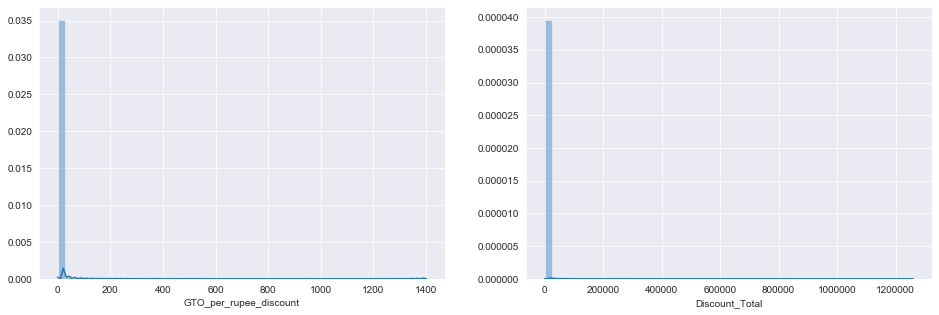

In [56]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df_high['GTO_per_rupee_discount'])
plt.subplot(1,2,2)
sns.distplot(new_df_high['Discount_Total'])
plt.show()

In [57]:
print("Highest allowed",new_df_high['GTO_per_rupee_discount'].mean() + 3*new_df_high['GTO_per_rupee_discount'].std())
print("Lowest allowed",new_df_high['GTO_per_rupee_discount'].mean() - 3*new_df_high['GTO_per_rupee_discount'].std())

Highest allowed 102.83634547218969
Lowest allowed -87.38095070356667


In [58]:
dataset=new_df_high[(new_df_high['GTO_per_rupee_discount'] > 0) | (new_df_high['GTO_per_rupee_discount'] < 102.7)]
dataset

,New_customer,Volume_2019,GTO_2019,Tax,Discount_Total,sfdc_tier_Tier 0,sfdc_tier_Tier 1,sfdc_tier_Tier 2,poc_image_0,poc_image_Mainstream,...,Brand_LEFFE,Brand_Other,Brand_STELLA ARTOIS,Pack_Type_BOTTLE,Pack_Type_KEG,Pack_Type_Other,Returnalility_OW,Returnalility_RETURNABLE,GTO_per_rupee_discount,change_in_consumption
2,0,0.022016,61551.06,3577.69,14511.46,0,1,0,0,1,...,0,0,0,0,0,1,1,0,4.241548,0.000000
3,0,0.003339,6001.00,519.41,1605.19,0,1,0,0,1,...,0,0,0,1,0,0,0,1,3.738498,0.000000
4,0,0.002620,3051.36,288.63,718.32,0,1,0,0,1,...,0,0,0,0,1,0,0,1,4.247912,0.000000
7,0,0.002563,2227.65,61.37,686.13,0,0,1,0,1,...,0,1,0,1,0,0,0,1,3.246688,0.000000
8,0,0.003079,3412.19,94.12,1050.98,0,0,1,0,1,...,0,1,0,1,0,0,0,1,3.246675,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39850,0,0.001613,91.98,6.99,44.43,0,0,1,0,1,...,1,0,0,1,0,0,0,1,2.070223,0.001795
39851,0,0.001633,214.14,17.81,94.58,0,0,1,0,1,...,1,0,0,1,0,0,0,1,2.264115,0.001795
39852,0,0.001541,0.00,0.00,0.00,0,0,1,0,1,...,0,1,0,1,0,0,0,1,2.008984,0.001795
39853,0,0.001608,51.44,4.58,26.37,0,0,1,0,1,...,0,0,1,1,0,0,0,1,1.950702,0.001795


In [59]:
#capping outliers
upper_limit = new_df_high['GTO_per_rupee_discount'].mean() + 3*new_df_high['GTO_per_rupee_discount'].std()
lower_limit = new_df_high['GTO_per_rupee_discount'].mean() - 3*new_df_high['GTO_per_rupee_discount'].std()

In [60]:
new_df_high['GTO_per_rupee_discount']= np.where(
    new_df_high['GTO_per_rupee_discount']>upper_limit,
    upper_limit,
    np.where(
        new_df_high['GTO_per_rupee_discount']<lower_limit,
        lower_limit,
        new_df_high['GTO_per_rupee_discount']
    )
)

In [61]:
new_df_high['GTO_per_rupee_discount']

2        4.241548
3        3.738498
4        4.247912
7        3.246688
8        3.246675
           ...   
39850    2.070223
39851    2.264115
39852    2.008984
39853    1.950702
39854    2.274702
Name: GTO_per_rupee_discount, Length: 33093, dtype: float64

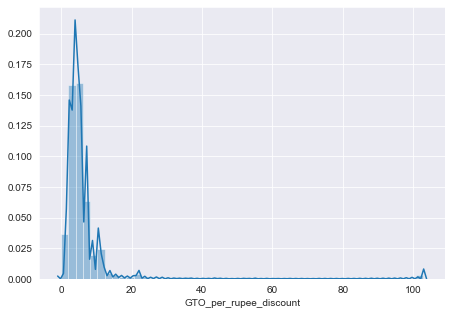

In [62]:
#box-plot method
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df_high['GTO_per_rupee_discount'])
plt.show()

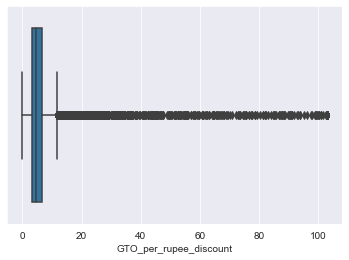

In [63]:
sns.boxplot(new_df_high['GTO_per_rupee_discount'])

In [64]:
#finding iqr
percentile25 = new_df_high['GTO_per_rupee_discount'].quantile(0.25)
percentile75 = new_df_high['GTO_per_rupee_discount'].quantile(0.75)
iqr=percentile75-percentile25

In [65]:
#finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [66]:
#finding outliers
new_df_high[new_df_high['GTO_per_rupee_discount'] > upper_limit]
new_df_high[new_df_high['GTO_per_rupee_discount'] < lower_limit]

,New_customer,Volume_2019,GTO_2019,Tax,Discount_Total,sfdc_tier_Tier 0,sfdc_tier_Tier 1,sfdc_tier_Tier 2,poc_image_0,poc_image_Mainstream,...,Brand_LEFFE,Brand_Other,Brand_STELLA ARTOIS,Pack_Type_BOTTLE,Pack_Type_KEG,Pack_Type_Other,Returnalility_OW,Returnalility_RETURNABLE,GTO_per_rupee_discount,change_in_consumption


In [67]:
new_df_high

,New_customer,Volume_2019,GTO_2019,Tax,Discount_Total,sfdc_tier_Tier 0,sfdc_tier_Tier 1,sfdc_tier_Tier 2,poc_image_0,poc_image_Mainstream,...,Brand_LEFFE,Brand_Other,Brand_STELLA ARTOIS,Pack_Type_BOTTLE,Pack_Type_KEG,Pack_Type_Other,Returnalility_OW,Returnalility_RETURNABLE,GTO_per_rupee_discount,change_in_consumption
2,0,0.022016,61551.06,3577.69,14511.46,0,1,0,0,1,...,0,0,0,0,0,1,1,0,4.241548,0.000000
3,0,0.003339,6001.00,519.41,1605.19,0,1,0,0,1,...,0,0,0,1,0,0,0,1,3.738498,0.000000
4,0,0.002620,3051.36,288.63,718.32,0,1,0,0,1,...,0,0,0,0,1,0,0,1,4.247912,0.000000
7,0,0.002563,2227.65,61.37,686.13,0,0,1,0,1,...,0,1,0,1,0,0,0,1,3.246688,0.000000
8,0,0.003079,3412.19,94.12,1050.98,0,0,1,0,1,...,0,1,0,1,0,0,0,1,3.246675,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39850,0,0.001613,91.98,6.99,44.43,0,0,1,0,1,...,1,0,0,1,0,0,0,1,2.070223,0.001795
39851,0,0.001633,214.14,17.81,94.58,0,0,1,0,1,...,1,0,0,1,0,0,0,1,2.264115,0.001795
39852,0,0.001541,0.00,0.00,0.00,0,0,1,0,1,...,0,1,0,1,0,0,0,1,2.008984,0.001795
39853,0,0.001608,51.44,4.58,26.37,0,0,1,0,1,...,0,0,1,1,0,0,0,1,1.950702,0.001795


In [68]:
#separate the other attributes from the predicting attribute
y = new_df_high['Discount_Total']
x = new_df_high.drop('Discount_Total',axis=1)
#separte the predicting attribute into Y for model training 


In [69]:
x.shape

(33093, 29)

In [70]:
y.shape

(33093,)

In [71]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [72]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_prediction =  LR.predict(x_test)
y_prediction

array([  -40.85739467,  -193.6824716 , -1176.78794503, ...,
        -171.56089973,   163.42686463,  -491.92146331])

In [74]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.9235163064980443
mean_sqrd_error is== 5588669.356784323
root_mean_squared error of is== 2364.036665702189


In [75]:
#r2 score is greater tha 0.8 therefore we can use this nodel to predict the discounts